In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0f34692d-3ab0-4a3d-8a9c-6a6022355396',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


In [10]:
type(data)

dict

In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.986028e+07,1.986028e+07,False,NaN,1,NaN,NaN,None,2025-05-05T04:09:00.000Z,94119.321226,2.094009e+10,32.4101,-0.060152,-1.812120,0.173825,12.394850,2.609271,-6.287104,1.869236e+12,63.7419,1.976506e+12,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
1,1027,Ethereum,ETH,ethereum,10265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207326e+08,1.207326e+08,True,NaN,2,NaN,NaN,None,2025-05-05T04:09:00.000Z,1795.483723,9.869422e+09,13.6689,-0.119759,-2.151012,0.538946,-0.924261,-21.484974,-36.423972,2.167734e+11,7.3921,2.167734e+11,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
2,825,Tether USDt,USDT,tether,126630,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.493594e+11,1.515125e+11,True,NaN,3,NaN,NaN,None,2025-05-05T04:09:00.000Z,0.999955,4.221786e+10,12.4064,-0.032126,-0.038862,-0.051824,0.028161,0.011062,-0.065751,1.493526e+11,5.0930,1.515056e+11,None,2025-05-05T04:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-04 21:11:09.074978
3,52,XRP,XRP,xrp,1600,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-05T04:09:00.000Z,2.152359,1.785595e+09,22.5767,-0.286622,-2.240484,-4.822101,1.598778,-14.333939,-20.801737,1.259206e+11,4.2928,2.152359e+11,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
4,1839,BNB,BNB,bnb,2510,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408898e+08,1.408898e+08,False,NaN,5,NaN,NaN,None,2025-05-05T04:10:00.000Z,588.676409,1.344751e+09,10.1294,0.040630,-1.922806,-2.504266,-1.294626,-2.439492,-2.530486,8.293850e+10,2.8282,8.293850e+10,None,2025-05-05T04:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
5,5426,Solana,SOL,solana,911,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.181918e+08,6.000617e+08,True,NaN,6,NaN,NaN,None,2025-05-05T04:09:00.000Z,145.247850,1.789339e+09,15.7383,0.256878,-0.346491,-2.413284,20.147032,-1.993626,-32.546020,7.526625e+10,2.5666,8.715766e+10,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
6,3408,USDC,USDC,usd-coin,27578,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.149126e+10,6.149126e+10,False,NaN,7,NaN,NaN,None,2025-05-05T04:09:00.000Z,0.999833,5.973601e+09,19.8839,-0.026709,-0.022273,-0.032775,-0.015979,-0.005342,0.015611,6.148101e+10,2.0965,6.148101e+10,None,2025-05-05T04:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-04 21:11:09.074978
7,74,Dogecoin,DOGE,dogecoin,1216,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.491311e+11,1.491311e+11,True,NaN,8,NaN,NaN,None,2025-05-05T04:10:00.000Z,0.170602,6.655338e+08,16.9779,-0.088520,-2.817731,-4.745986,0.650407,-18.345883,-39.397645,2.544202e+10,0.8676,2.544202e+10,None,2025-05-05T04:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
8,2010,Cardano,ADA,cardano,1511,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.50

In [73]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0f34692d-3ab0-4a3d-8a9c-6a6022355396',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Admin\Notebook Projects\API.csv'):
        df.to_csv(r'C:\Users\Admin\Notebook Projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Admin\Notebook Projects\API.csv', mode = 'a', header=False)


In [17]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner complete successfully')
    sleep(60) #sleep for 1 minute
exit()

NameError: name 'api_runner' is not defined

In [19]:
df3 = pd.read_csv(r'C:\Users\Admin\Notebook Projects\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12055,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.985900e+07,1.985900e+07,False,NaN,1,NaN,NaN,NaN,2025-05-02T10:42:00.000Z,96867.233799,3.152008e+10,-0.0443,0.231881,0.720817,3.384214,14.024594,5.033811,-4.843076,1.923686e+12,63.8462,2.034212e+12,NaN,2025-05-02T10:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
1,1,1027,Ethereum,ETH,ethereum,10244,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207327e+08,1.207327e+08,True,NaN,2,NaN,NaN,NaN,2025-05-02T10:43:00.000Z,1829.311543,1.552856e+10,-3.9576,0.306807,-0.406923,3.092702,-2.410198,-22.466564,-43.521249,2.208578e+11,7.3302,2.208578e+11,NaN,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
2,2,825,Tether USDt,USDT,tether,126493,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.489047e+11,1.515146e+11,True,NaN,3,NaN,NaN,NaN,2025-05-02T10:42:00.000Z,1.000243,6.191119e+10,-3.5504,-0.000120,0.010162,0.001156,0.035282,0.054956,0.042529,1.489408e+11,4.9433,1.515514e+11,NaN,2025-05-02T10:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-02 04:13:18.732168
3,3,52,XRP,XRP,xrp,1597,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,NaN,2025-05-02T10:42:00.000Z,2.213560,2.241578e+09,-34.2073,0.290917,-0.884085,1.133532,4.443893,-16.321537,-25.813961,1.295011e+11,4.2970,2.213560e+11,NaN,2025-05-02T10:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
4,4,1839,BNB,BNB,bnb,2506,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408900e+08,1.408900e+08,False,NaN,5,NaN,NaN,NaN,2025-05-02T10:43:00.000Z,599.258503,1.434605e+09,-1.2842,0.157351,-0.695499,-1.173791,-0.263433,-0.757466,-10.610721,8.442952e+10,2.8022,8.442952e+10,NaN,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
5,5,5426,Solana,SOL,solana,909,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.179537e+08,5.997649e+08,True,NaN,6,NaN,NaN,NaN,2025-05-02T10:43:00.000Z,150.056461,3.191834e+09,-3.5776,0.322306,-1.101267,-2.116647,19.389683,-6.941306,-34.155008,7.772230e+10,2.5796,8.999860e+10,NaN,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
6,6,3408,USDC,USDC,usd-coin,27541,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.139258e+10,6.139258e+10,False,NaN,7,NaN,NaN,NaN,2025-05-02T10:43:00.000Z,0.999878,1.016318e+10,-4.0397,-0.000949,-0.001814,-0.006033,0.014180,-0.007693,-0.018653,6.138511e+10,2.0373,6.138511e+10,NaN,2025-05-02T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-02 04:13:18.732168
7,7,74,Dogecoin,DOGE,dogecoin,1214,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.490941e+11,1.490941e+11,True,NaN,8,NaN,NaN,NaN,2025-05-02T10:43:00.000Z,0.180576,1.134482e+09,14.7616,0.302527,1.153680,-0.061846,4.853980,-18.090016,-44.130739,2.692285e+10,0.8936,2.692285e+10,NaN,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 04:13:18.732168
8,8,2010,Cardano,ADA,cardano,1510,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart..."

In [71]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12055,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.985900e+07,1.985900e+07,False,NaN,1,NaN,NaN,None,2025-05-02T10:42:00.000Z,96867.233799,3.152008e+10,-0.0443,0.231881,0.720817,3.384214,14.024594,5.033811,-4.843076,1.923686e+12,63.8462,2.034212e+12,None,2025-05-02T10:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
1,1027,Ethereum,ETH,ethereum,10244,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207327e+08,1.207327e+08,True,NaN,2,NaN,NaN,None,2025-05-02T10:43:00.000Z,1829.311543,1.552856e+10,-3.9576,0.306807,-0.406923,3.092702,-2.410198,-22.466564,-43.521249,2.208578e+11,7.3302,2.208578e+11,None,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
2,825,Tether USDt,USDT,tether,126493,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.489047e+11,1.515146e+11,True,NaN,3,NaN,NaN,None,2025-05-02T10:42:00.000Z,1.000243,6.191119e+10,-3.5504,-0.000120,0.010162,0.001156,0.035282,0.054956,0.042529,1.489408e+11,4.9433,1.515514e+11,None,2025-05-02T10:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-02 03:44:22.239068
3,52,XRP,XRP,xrp,1597,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-02T10:42:00.000Z,2.213560,2.241578e+09,-34.2073,0.290917,-0.884085,1.133532,4.443893,-16.321537,-25.813961,1.295011e+11,4.2970,2.213560e+11,None,2025-05-02T10:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
4,1839,BNB,BNB,bnb,2506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408900e+08,1.408900e+08,False,NaN,5,NaN,NaN,None,2025-05-02T10:43:00.000Z,599.258503,1.434605e+09,-1.2842,0.157351,-0.695499,-1.173791,-0.263433,-0.757466,-10.610721,8.442952e+10,2.8022,8.442952e+10,None,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
5,5426,Solana,SOL,solana,909,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.179537e+08,5.997649e+08,True,NaN,6,NaN,NaN,None,2025-05-02T10:43:00.000Z,150.056461,3.191834e+09,-3.5776,0.322306,-1.101267,-2.116647,19.389683,-6.941306,-34.155008,7.772230e+10,2.5796,8.999860e+10,None,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
6,3408,USDC,USDC,usd-coin,27541,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.139258e+10,6.139258e+10,False,NaN,7,NaN,NaN,None,2025-05-02T10:43:00.000Z,0.999878,1.016318e+10,-4.0397,-0.000949,-0.001814,-0.006033,0.014180,-0.007693,-0.018653,6.138511e+10,2.0373,6.138511e+10,None,2025-05-02T10:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-02 03:44:22.239068
7,74,Dogecoin,DOGE,dogecoin,1214,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.490941e+11,1.490941e+11,True,NaN,8,NaN,NaN,None,2025-05-02T10:43:00.000Z,0.180576,1.134482e+09,14.7616,0.302527,1.153680,-0.061846,4.853980,-18.090016,-44.130739,2.692285e+10,0.8936,2.692285e+10,None,2025-05-02T10:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-02 03:44:22.239068
8,2010,Cardano,ADA,cardano,1510,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12056,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19860278.00000,19860278.00000,False,NaN,1,NaN,NaN,None,2025-05-05T04:09:00.000Z,94119.32123,20940093746.25603,32.41010,-0.06015,-1.81212,0.17382,12.39485,2.60927,-6.28710,1869235884727.20117,63.74190,1976505745753.96997,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
1,1027,Ethereum,ETH,ethereum,10265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120732563.27869,120732563.27869,True,NaN,2,NaN,NaN,None,2025-05-05T04:09:00.000Z,1795.48372,9869421864.56201,13.66890,-0.11976,-2.15101,0.53895,-0.92426,-21.48497,-36.42397,216773352175.19470,7.39210,216773352175.19000,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
2,825,Tether USDt,USDT,tether,126630,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,149359355091.25079,151512481347.58417,True,NaN,3,NaN,NaN,None,2025-05-05T04:09:00.000Z,0.99995,42217855592.76178,12.40640,-0.03213,-0.03886,-0.05182,0.02816,0.01106,-0.06575,149352606384.22653,5.09300,151505635352.92999,None,2025-05-05T04:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-04 21:11:09.074978
3,52,XRP,XRP,xrp,1600,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58503545101.00000,99986181777.00000,False,NaN,4,NaN,NaN,None,2025-05-05T04:09:00.000Z,2.15236,1785594879.60441,22.57670,-0.28662,-2.24048,-4.82210,1.59878,-14.33394,-20.80174,125920610441.99158,4.29280,215235863441.44000,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
4,1839,BNB,BNB,bnb,2510,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140889803.52000,140889803.52000,False,NaN,5,NaN,NaN,None,2025-05-05T04:10:00.000Z,588.67641,1344751102.41433,10.12940,0.04063,-1.92281,-2.50427,-1.29463,-2.43949,-2.53049,82938503652.87398,2.82820,82938503652.87000,None,2025-05-05T04:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
5,5426,Solana,SOL,solana,911,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,518191826.63522,600061653.00373,True,NaN,6,NaN,NaN,None,2025-05-05T04:09:00.000Z,145.24785,1789339295.82989,15.73830,0.25688,-0.34649,-2.41328,20.14703,-1.99363,-32.54602,75266248587.25829,2.56660,87157664828.34000,None,2025-05-05T04:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-04 21:11:09.074978
6,3408,USDC,USDC,usd-coin,27578,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61491259396.63703,61491259396.63703,False,NaN,7,NaN,NaN,None,2025-05-05T04:09:00.000Z,0.99983,5973601165.67875,19.88390,-0.02671,-0.02227,-0.03277,-0.01598,-0.00534,0.01561,61481005261.39058,2.09650,61481005261.39000,None,2025-05-05T04:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-04 21:11:09.074978
7,74,Dogecoin,DOGE,dogecoin,1216,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149131126383.70523,149131126383.70523,True,NaN,8,NaN,NaN,None,2025-05-05T04:10:00.000Z,0.17060,665533831.67013,16.97790,-0.08852,-2.81773,-4.74599,0.65041,-18.34588,-39.39765,25442020288.62454,0.86760,25442020288.62000,None,2025-05-05T04:10:00.

In [27]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06015,-1.81212,0.17382,12.39485,2.60927,-6.28710
Ethereum,-0.11976,-2.15101,0.53895,-0.92426,-21.48497,-36.42397
Tether USDt,-0.03213,-0.03886,-0.05182,0.02816,0.01106,-0.06575
XRP,-0.28662,-2.24048,-4.82210,1.59878,-14.33394,-20.80174
BNB,0.04063,-1.92281,-2.50427,-1.29463,-2.43949,-2.53049
Solana,0.25688,-0.34649,-2.41328,20.14703,-1.99363,-32.54602
USDC,-0.02671,-0.02227,-0.03277,-0.01598,-0.00534,0.01561
Dogecoin,-0.08852,-2.81773,-4.74599,0.65041,-18.34588,-39.39765
Cardano,-0.12645,-3.60156,-4.82720,2.53389,-29.77307,-14.68504


In [29]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.06015
              quote.USD.percent_change_24h    -1.81212
              quote.USD.percent_change_7d      0.17382
              quote.USD.percent_change_30d    12.39485
              quote.USD.percent_change_60d     2.60927
              quote.USD.percent_change_90d    -6.28710
Ethereum      quote.USD.percent_change_1h     -0.11976
              quote.USD.percent_change_24h    -2.15101
              quote.USD.percent_change_7d      0.53895
              quote.USD.percent_change_30d    -0.92426
              quote.USD.percent_change_60d   -21.48497
              quote.USD.percent_change_90d   -36.42397
Tether USDt   quote.USD.percent_change_1h     -0.03213
              quote.USD.percent_change_24h    -0.03886
              quote.USD.percent_change_7d     -0.05182
              quote.USD.percent_change_30d     0.02816
              quote.USD.percent_change_60d     0.01106
              quote.US

In [33]:
df5.count()
type(df5)
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.06015
             quote.USD.percent_change_24h  -1.81212
             quote.USD.percent_change_7d    0.17382
             quote.USD.percent_change_30d  12.39485
             quote.USD.percent_change_60d   2.60927
             quote.USD.percent_change_90d  -6.28710
Ethereum     quote.USD.percent_change_1h   -0.11976
             quote.USD.percent_change_24h  -2.15101
             quote.USD.percent_change_7d    0.53895
             quote.USD.percent_change_30d  -0.92426
             quote.USD.percent_change_60d -21.48497
             quote.USD.percent_change_90d -36.42397
Tether USDt  quote.USD.percent_change_1h   -0.03213
             quote.USD.percent_change_24h  -0.03886
             quote.USD.percent_change_7d   -0.05182
             quote.USD.percent_change_30d   0.02816
             quote.USD.percent_change_60d   0.01106
             quote.USD.percent_change_90d  -0.06575
XRP          quote.USD.percent_change_1h   -0.28662
             quote.USD.percent_change_24h  -2.24048
             quote.USD.percent_change_7d   -4.82210
             quote.USD.percent_change_30d   1.59878
             quote.USD.percent_change_60d -14.33394
             quote.USD.percent_change_90d -20.80174
BNB          quote.USD.percent_change_1h    0.04063
             quote.USD.percent_change_24h  -1.92281
             quote.USD.percent_change_7d   -2.50427
             quote.USD.percent_change_30d  -1.29463
             quote.USD.percent_change_60d  -2.43949
             quote.USD.percent_change_90d  -2.53049
Solana       quote.USD.percent_change_1h    0.25688
             quote.USD.percent_change_24h  -0.34649
             quote.USD.percent_change_7d   -2.41328
             quote.USD.percent_change_30d  20.14703
             quote.USD.percent_change_60d  -1.99363
             quote.USD.percent_change_90d -32.54602
USDC         quote.USD.percent_change_1h   -0.02671
             quote.USD.percent_change_24h  -0.02227
             quote.USD.percent_change_7d   -0.03277
             quote.USD.percent_change_30d  -0.01598
             quote.USD.percent_change_60d  -0.00534
             quote.USD.percent_change_90d   0.01561
Dogecoin     quote.USD.percent_change_1h   -0.08852
             quote.USD.percent_change_24h  -2.81773
             quote.USD.percent_change_7d   -4.74599
             quote.USD.percent_change_30d   0.65041
             quote.USD.percent_change_60d -18.34588
             quote.USD.percent_change_90d -39.39765
Cardano      quote.USD.percent_change_1h   -0.12645
             quote.USD.percent_change_24h  -3.60156
             quote.USD.percent_change_7d   -4.82720
             quote.USD.percent_change_30d   2.53389
             quote.USD.percent_change_60d -29.77307
             quote.USD.percent_change_90d -14.68504
TRON         quote.USD.percent_change_1h    0.12059
             quote.USD.percent_change_24h   0.80195
             quote.USD.percent_change_7d    2.21046
             quote.USD.percent_change_30d   5.03564
             quote.USD.percent_change_60d   2.14212
             quote.USD.percent_change_90d  10.35478
Sui          quote.USD.percent_change_1h   -0.75235
             quote.USD.percent_change_24h   0.88694
             quote.USD.percent_change_7d   -7.84940
             quote.USD.percent_change_30d  46.73650
             quote.USD.percent_change_60d  23.37401
             quote.USD.percent_change_90d  -8.00620
Chainlink    quote.USD.percent_change_1h   -0.56967
             quote.USD.percent_change_24h  -2.14024
             quote.USD.percent_change_7d   -6.63477
             quote.USD.percent_change_30d   8.06295
             quote.USD.percent_change_60d -19.28759
             quote.USD.percent_change_90d -33.69712
UNUS SED LEO quote.USD.percent_change_1h    0.07213
             quote.USD.percent_change_24h   1.13510
             quote.USD.percent_change_7d    0.05916
             quote.USD.percent_change_30d

In [35]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06015
1,Bitcoin,quote.USD.percent_change_24h,-1.81212
2,Bitcoin,quote.USD.percent_change_7d,0.17382
3,Bitcoin,quote.USD.percent_change_30d,12.39485
4,Bitcoin,quote.USD.percent_change_60d,2.60927
5,Bitcoin,quote.USD.percent_change_90d,-6.28710
6,Ethereum,quote.USD.percent_change_1h,-0.11976
7,Ethereum,quote.USD.percent_change_24h,-2.15101
8,Ethereum,quote.USD.percent_change_7d,0.53895
9,Ethereum,quote.USD.percent_change_30d,-0.92426


In [65]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06015
1,Bitcoin,quote.USD.percent_change_24h,-1.81212
2,Bitcoin,quote.USD.percent_change_7d,0.17382
3,Bitcoin,quote.USD.percent_change_30d,12.39485
4,Bitcoin,quote.USD.percent_change_60d,2.60927
5,Bitcoin,quote.USD.percent_change_90d,-6.28710
6,Ethereum,quote.USD.percent_change_1h,-0.11976
7,Ethereum,quote.USD.percent_change_24h,-2.15101
8,Ethereum,quote.USD.percent_change_7d,0.53895
9,Ethereum,quote.USD.percent_change_30d,-0.92426


In [67]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.06015
1,Bitcoin,24h,-1.81212
2,Bitcoin,7d,0.17382
3,Bitcoin,30d,12.39485
4,Bitcoin,60d,2.60927
5,Bitcoin,90d,-6.28710
6,Ethereum,1h,-0.11976
7,Ethereum,24h,-2.15101
8,Ethereum,7d,0.53895
9,Ethereum,30d,-0.92426


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

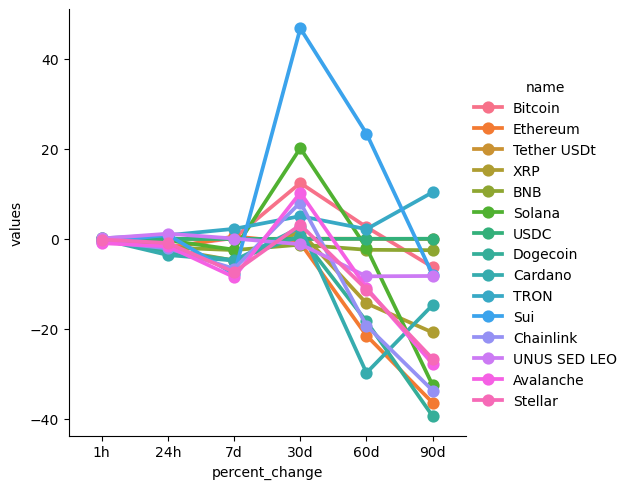

In [71]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [79]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9.query("name=='Bitcoin'")

,name,quote.USD.price,timestamp
0,Bitcoin,94119.32123,2025-05-04 21:11:09.074978
